In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import glob
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

import sys; sys.path.insert(1, '/home/alessandro/thesis_material')
import os

import geometry as gm
#import conversion as cnv
from func_statistics import * # compute_pdf_nbin, slopes_r_p, slope_time, slope_maps
#from coare_functions import *

import meteo                    # wind_dir_speed
import metpy.calc as mpcalc
from metpy.units import units
import lcl

from windrose import WindroseAxes
import cartopy.crs as ccrs
crs = ccrs.PlateCarree()
#from plotmap import plot_background

from plotdistr import * #fb_distribution_npoint, perc_distribution, scatterplot_fit, hist2d, perc_distribution_pvalue
from pdist_fb_distrib_save_fast import *

import warnings; warnings.filterwarnings("ignore")

In [3]:
# find data
path = '/saturn/simu_Caribbean/coupled_2km/output/'
files_ls = ['QCLOUD', 'U', 'V', 'W', 'OLR', 'PH', 'PHB', 'QVAPOR', 'PB', 'P', 'T']
files_ls = [name + '.nc' for name in files_ls]
wrf_files = [path+name for name in files_ls]
#fname_list = sorted(glob.glob(wrf_files + '*'))

In [4]:
# import sea_mask
if os.path.exists('/home/alessandro/thesis_material/EURECA_scripts/sea_mask_EU_new.npy'):
    sea_mask = np.load('/home/alessandro/thesis_material/EURECA_scripts/sea_mask_EU_new.npy')
    
if os.path.exists('/home/alessandro/thesis_material/EURECA_scripts/masks/sea_mask_EU_noWarmPatch_noWest.npy'):
    sea_mask_modified = np.load('/home/alessandro/thesis_material/EURECA_scripts/masks/sea_mask_EU_noWarmPatch_noWest.npy')
    sea_mask_modified_nan = np.ones_like(sea_mask_modified)
    sea_mask_modified_nan[sea_mask_modified==0] = np.nan

In [5]:
# MATTE AVEVA GIA' CALCOLATO TUTTE LE CORRELAZIONI 
# E HA STIMATO QUESTA LUNGHEZZA?
L = 30
nskip = int(L/2)
nt = int(1)

# from top pbl upwards
# SOPRA PBL LA LUNGEHZZA DI CORRELAZIONE AUMENTA?
# NEL SENSO CHE I SEGNALI HANNO PIù SPAZIO PER PROPAGARSI?
Ltop = 150
nskiptop = int(Ltop/2)
nttop = int(1)

# reference population mean
popmean = 0.

In [6]:
with open('/venus/tesi_ale/data_EU/SST/daily/FEB/dSST_day_feb.npy', 'rb') as f:
    dsst_day = np.load(f)
    f.close()
    
dsst_day = dsst_day*sea_mask_modified_nan



'''with open('/venus/tesi_ale/data_EU/PBLH/daily/FEB/pdistrs_PBLH_dSST_day_feb.npy', 'rb') as f:
    delete = np.load(f)
    pdist_PBLH_dsst = np.load(f)
    f.close()

del delete'''

"with open('/venus/tesi_ale/data_EU/PBLH/daily/FEB/pdistrs_PBLH_dSST_day_feb.npy', 'rb') as f:\n    delete = np.load(f)\n    pdist_PBLH_dsst = np.load(f)\n    f.close()\n\ndel delete"

In [119]:
wrf_hourly = path + 'Caraibes_WRF_3h_surf.nc'
ds_hourly = xr.open_dataset(wrf_hourly)
ds_hourly = ds_hourly.sel(time_counter=slice('2020-02-01T01:30:00.000000000', '2020-02-29T22:30:00.000000000'))

# lat and lon
lon = ds_hourly['nav_lon'].values
lat = ds_hourly['nav_lat'].values

In [7]:
# load U component
U_day = xr.open_dataset(wrf_files[files_ls.index('U.nc')])
U_day = U_day['U'].sel(time_counter=slice('2020-02-01T01:30:00.000000000', '2020-02-29T22:30:00.000000000')).groupby('time_counter.day').mean()

i = np.arange(0, sea_mask.shape[1])
U_day = 0.5*(U_day[:,:,:,i] + U_day[:,:,:,i+1])

In [8]:
# select data oversea
U_day = U_day.where(sea_mask, drop=False)

In [7]:
U_day = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/U/U_day_feb.npy')

In [12]:
my_save_data('/venus/tesi_ale/data_EU/WIND/daily/FEB/U/U_day_feb.npy', [U_day])

In [13]:
## U DISTRIBUTION
perc_step = 5
nbins = int(100/perc_step) # Number of bins.

pdist_dsst, pdist_U, pstd_U, pstderr_U, pnpoints_U, ppvalue_U_sub = \
dist_3d_subsample(dsst_day, U_day, perc_step, nbins, popmean, nt, nttop, nskip, nskiptop, top=14, perc_fixbin='perc')

0
10
20
30


In [9]:
# load V component
V_day = xr.open_dataset(wrf_files[files_ls.index('V.nc')])
V_day = V_day['V'].sel(time_counter=slice('2020-02-01T01:30:00.000000000', '2020-03-01T01:30:00.000000000')).groupby('time_counter.day').mean()

j = np.arange(0, sea_mask.shape[0])
V_day = 0.5*(V_day[:,:,j,:] + V_day[:,:,j+1,:])

In [12]:
# select data oversea
V_day = V_day.where(sea_mask, drop=False)

NameError: name 'V_day' is not defined

In [8]:
V_day = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/V/V_day_feb.npy')

In [13]:
my_save_data('/venus/tesi_ale/data_EU/WIND/daily/FEB/V/V_day_feb.npy', [V_day])

In [16]:
## V DISTRIBVTION
perc_step = 5
nbins = int(100/perc_step) # NVmber of bins.

pdist_dsst, pdist_V, pstd_V, pstderr_V, pnpoints_V, ppvalVe_V_sub = \
dist_3d_subsample(dsst_day, V_day, perc_step, nbins, popmean, nt, nttop, nskip, nskiptop, top=14, perc_fixbin='perc')

0
10
20
30


In [9]:
# reading temperature
pot_temp = xr.open_dataset(wrf_files[files_ls.index('T.nc')])
pot_temp = pot_temp['T']
pot_temp = pot_temp.sel(time_counter=slice('2020-02-01T01:30:00.000000000', '2020-03-01T01:30:00.000000000'))
pot_temp = pot_temp.where(sea_mask, drop=False)
pot_temp = pot_temp.groupby('time_counter.day').mean()

T0 = 300. 

pot_temp_full = pot_temp+T0

In [18]:
s = 100

pot_temp_mean = np.zeros(pot_temp_full.values.shape)
dtheta = np.zeros(pot_temp_full.values.shape)

for t in range(0,pot_temp_full.values.shape[0]):
    if t % 10 == 0:
        print(t)

    for h in range(0,pot_temp_full.values.shape[1]):
        pot_temp_mean[t,h] = gm.nan_gaussian_filter(pot_temp_full[t,h],s)                               
        dtheta[t,h] = pot_temp_full[t,h] - pot_temp_mean[t,h]

0
10
20


In [111]:
my_save_data('/venus/tesi_ale/data_EU/T/daily/FEB/PotTemp_meanLS_anomSS_day_feb.npy', [pot_temp_mean, dtheta])

In [11]:
## TEMPERATURE DISTRIBUTION
perc_step = 5
nbins = int(100/perc_step) # Number of bins.

pdist_dsst, pdist_theta, pstd_theta, pstderr_theta, pnpoints_theta, ppvalue_theta_sub = \
dist_3d_subsample(dsst_day, pot_temp_full.values, perc_step, nbins, popmean, nt, nttop, nskip, nskiptop, top=14, perc_fixbin='perc')

0
10
20
30


In [10]:
# reading geopotential height
GPH_base = xr.open_dataset(wrf_files[files_ls.index('PHB.nc')])
GPH_base = GPH_base['PHB']/9.81

GPH = xr.open_dataset(wrf_files[files_ls.index('PH.nc')])
GPH = GPH.sel(time_counter=slice('2020-02-01T01:30:00.000000000', '2020-03-01T01:30:00.000000000'))
GPH = GPH['PH']/9.81

GPH = GPH_base + GPH
GPH = GPH.transpose('time_counter', 'lev_W', 'y_grid_M', 'x_grid_M')
GPH = GPH.where(sea_mask, drop=False)

GPH = GPH.groupby('time_counter.day').mean()

#GPH_base = GPH_base.where(sea_mask, drop=False)
del GPH_base

In [11]:
# vertical interpolation of geopotential
GPH_inter = np.zeros_like(pot_temp)
for i in range(39):
    GPH_inter[:,i,:,:] = (GPH[:,i+1,:,:]+GPH[:,i,:,:])*0.5

In [10]:
GPH_inter = np.load('/venus/tesi_ale/data_EU/GPH/daily/FEB/GPH_inter_day_feb.npy')

In [113]:
my_save_data('/venus/tesi_ale/data_EU/GPH/daily/FEB/GPH_inter_day_feb.npy', [GPH_inter])

In [27]:
## GPH DISTRIBVTION
perc_step = 5
nbins = int(100/perc_step) # NVmber of bins.

pdist_dsst, pdist_gph, pstd_gph, pstderr_gph, pnpoints_gph, ppvalue_gph_sub = \
dist_3d_subsample(dsst_day, GPH_inter, perc_step, nbins, popmean, nt, nttop, nskip, nskiptop, top=14, perc_fixbin='perc')

0
10
20
30


In [8]:
# mean GPH over domain
GPH_mean = GPH.mean(axis=(0,2,3))

In [9]:
my_save_data('/venus/tesi_ale/data_EU/GPH/daily/FEB/GPH_mean_column.npy', [GPH_mean])

In [9]:
# GPH_mean = np.load('/venus/tesi_ale/data_EU/GPH/daily/FEB/GPH_mean_column.npy')
mean_vert_pres = np.load('/venus/tesi_ale/data_EU/PRES/daily/FEB/mean_vert_pres.npy')

In [89]:
s = 100

GPH_smooth = np.zeros(GPH_inter.shape)

for t in range(0,GPH_smooth.shape[0]):
    if t % 10 == 0:
        print(t)

    for h in range(0,GPH_smooth.shape[1]):
        GPH_smooth[t,h] = gm.nan_gaussian_filter(GPH_inter[t,h],s)                               

0
10
20


In [ ]:
# my_save_data('/venus/tesi_ale/data_EU/GPH/daily/FEB/GPH_meanLS_day_feb.npy', [GPH_smooth])

### Updating the code

In [22]:
### LOAD PRESSURE COLUMN
mean_vert_pres = np.load('/venus/tesi_ale/data_EU/PRES/daily/FEB/mean_vert_pres.npy')

In [10]:
Ri_3h = np.load('/venus/tesi_ale/data_EU/RI/daily/FEB/RI_3h_feb.npy')
Ri_3h = Ri_3h*sea_mask_modified_nan


In [124]:
PBLH = ds_hourly['PBLH']
PBLH = PBLH[::3].values

PBLH_pres = mpcalc.height_to_pressure_std(PBLH*units.meters)
PBLH_pres = PBLH_pres.magnitude #.m_as('hPa')

Text(0, 0.5, 'pressure [hPa]')

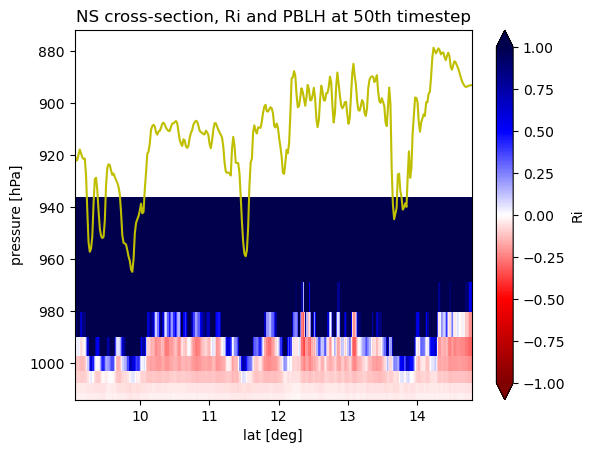

In [135]:
# plt.pcolormesh(Ri_3h[50,4], vmin=-0.2, vmax=0.2, cmap='seismic_r')
fig, ax = plt.subplots(1,1)

ax.invert_yaxis()
mappa = ax.pcolormesh(lat[200:-25, 350], mean_vert_pres[0:10], Ri_3h[50,0:10,200:-25,350], vmin=-1, vmax=1, cmap='seismic_r')
plt.colorbar(mappa, ax=ax, extend='both', label='Ri')

ax.plot(lat[200:-25, 300], PBLH_pres[50,200:-25, 350], '-y')


ax.set_title('NS cross-section, Ri and PBLH at 50th timestep')
ax.set_xlabel('lat [deg]')
ax.set_ylabel('pressure [hPa]')

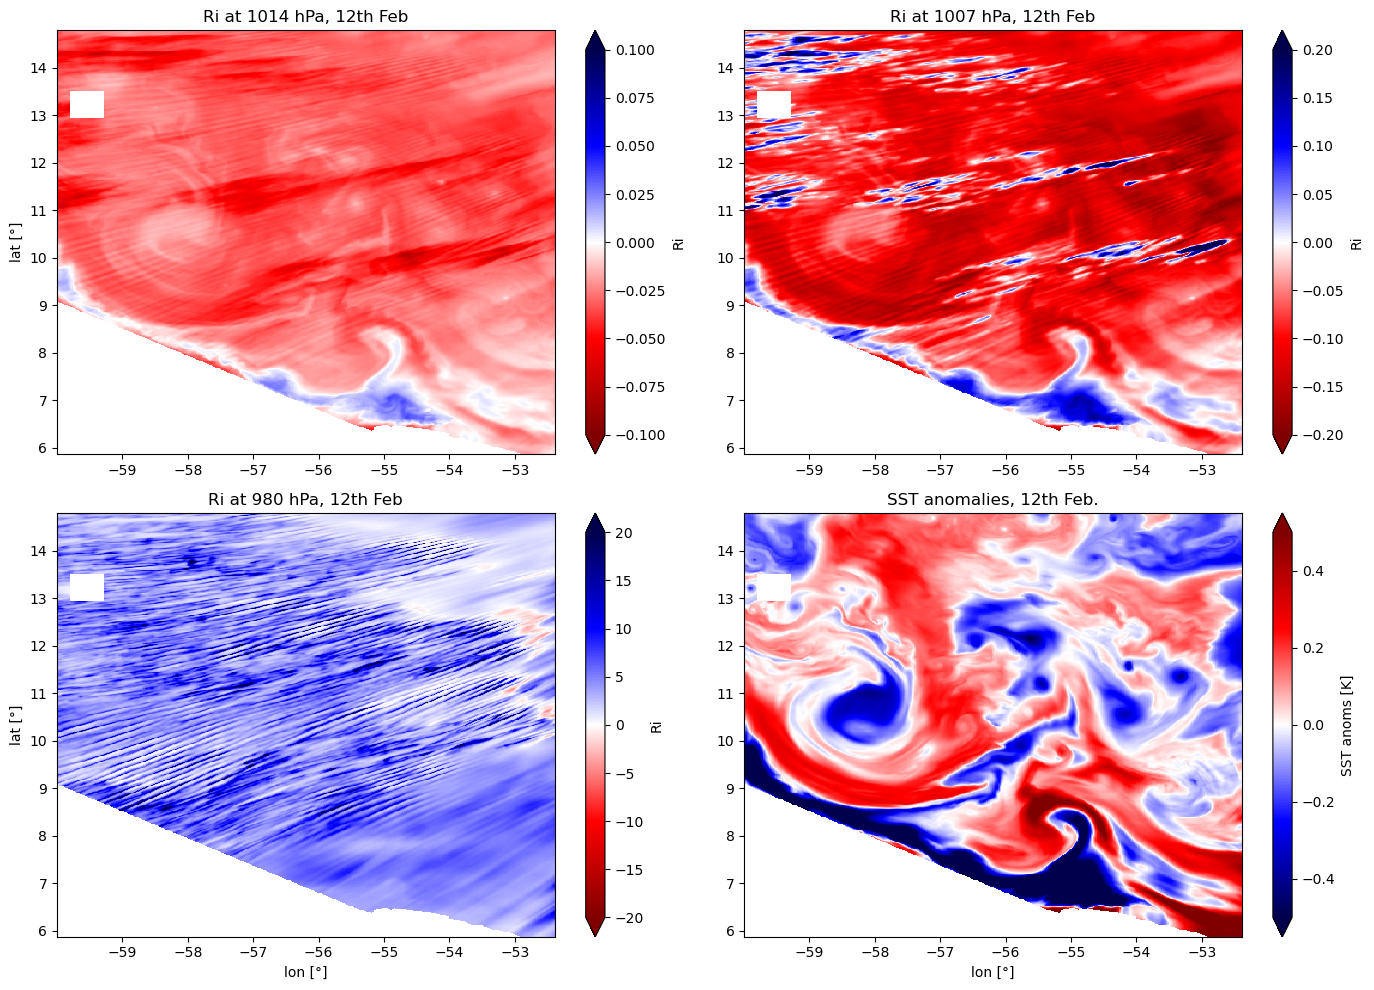

In [134]:


# Create a 2x2 subplot frame
fig, axs = plt.subplots(2, 2, figsize=(14, 10))


# Plot 1: Ri
im1 = axs[0, 0].pcolormesh(lon[25:-25,132:-25], lat[25:-25,132:-25], 
                           Ri_3h[50, 0, 25:-25,132:-25], vmin=-0.1, vmax=0.1, cmap='seismic_r')
axs[0, 0].set_title(f'Ri at {int(mean_vert_pres[0])} hPa, 12th Feb')
# axs[0, 0].set_xlabel('lon [°]')
axs[0, 0].set_ylabel('lat [°]')
fig.colorbar(im1, ax=axs[0, 0], label='Ri' , extend='both')




# Plot 2: Ri
im1 = axs[0, 1].pcolormesh(lon[25:-25,132:-25], lat[25:-25,132:-25], 
                           Ri_3h[50, 2, 25:-25,132:-25], vmin=-0.2, vmax=0.2, cmap='seismic_r')
axs[0, 1].set_title(f'Ri at {int(mean_vert_pres[2])} hPa, 12th Feb')
# axs[0, 1].set_xlabel('lon [°])
# axs[0, 1].set_ylabel('lat [°]')
fig.colorbar(im1, ax=axs[0, 1], label='Ri', extend='both')



# Plot 1: Ri
im1 = axs[1, 0].pcolormesh(lon[25:-25,132:-25], lat[25:-25,132:-25], 
                           Ri_3h[50, 6, 25:-25,132:-25], vmin=-20, vmax=20, cmap='seismic_r')
axs[1, 0].set_title(f'Ri at {int(mean_vert_pres[6])} hPa, 12th Feb')
axs[1, 0].set_xlabel('lon [°]')
axs[1, 0].set_ylabel('lat [°]')
fig.colorbar(im1, ax=axs[1, 0], label='Ri', extend='both')



# Plot 2: SST anomalies
im2 = axs[1, 1].pcolormesh(lon[25:-25,132:-25], lat[25:-25,132:-25], 
                           dsst_day[6,25:-25,132:-25], vmin=-0.5, vmax=0.5, cmap='seismic')
axs[1, 1].set_title('SST anomalies, 12th Feb.')
axs[1, 1].set_xlabel('lon [°]')
# axs[1, 1].set_ylabel('lat [°]')
fig.colorbar(im2, ax=axs[1, 1], label='SST anoms [K]', extend='both')

# Adjust layout
plt.tight_layout()


# plt.savefig('/venus/tesi_ale/img_EU/RI/daily/FEB/NEW_map_dsst_Ri_comparison_3hr_12th.png')


plt.show()


In [133]:
lon[:,300]

array([-56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918167,
       -56.918167, -56.918167, -56.918167, -56.918167, -56.918

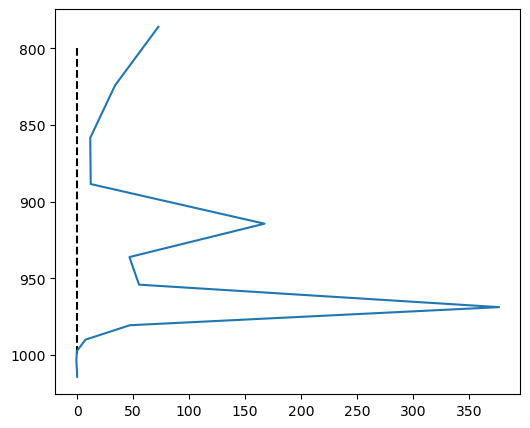

In [41]:
fig, ax = plt.subplots(figsize=(6,5))

ax.invert_yaxis()
ax.plot(Ri_3h[20,0:15,400,400], mean_vert_pres[0:15], )
plt.vlines(0, ymin=800, ymax=1000, color='k', linestyle='--')

In [91]:
##### COMPUTING PERCENTAGE CHANGE IN LS RI AND SS RI
Ri_change = 100*(Ri_full - Ri_mean)/(Ri_mean)

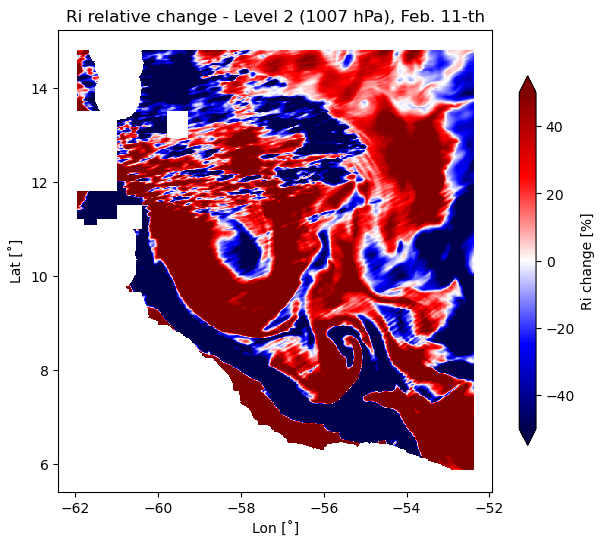

In [106]:
minval = -50 #if perc else -0.05
maxval = -minval 
level = int(2); day = int(10)

######### THIS IS FOR RIFULL/RIMEAN
# title = f'$Ri_{{full}}$ / $Ri_{{LS}}$ - Level {level} ({int(mean_vert_pres[level])} hPa), Feb. {day+1}-th'


# fig, ax1 = plt.subplots(figsize=(7, 6))  
# p1 = plt.pcolormesh(lon_M, lat_M, Ri_full[day,level,:,:]/Ri_mean[day,level,:,:], cmap='jet', vmin=minval, vmax=maxval)
# ax1.set_xlabel('Lon [˚]'); ax1.set_ylabel('Lat [˚]')
# ax1.set_title(f'{title}')
# cbar = plt.colorbar(p1,ax=ax1, location='right', shrink=0.8, extend='both')  
# cbar.set_label('$Ri_{full}$ / $Ri_{LS}$')



#########  THIS IS FOR RELATIVE CHANGE
title=f'Ri relative change - Level {level} ({int(mean_vert_pres[level])} hPa), Feb. {day+1}-th'

fig, ax1 = plt.subplots(figsize=(7, 6))  
p1 = plt.pcolormesh(lon_M, lat_M, Ri_change[day,level,:,:], cmap='seismic', vmin=minval, vmax=maxval)
ax1.set_xlabel('Lon [˚]'); ax1.set_ylabel('Lat [˚]')
ax1.set_title(f'{title}')
cbar = plt.colorbar(p1,ax=ax1, location='right', shrink=0.8, extend='both')  
cbar.set_label('Ri change [%]')


######## THIS IS FOR THE FULL RI
# title=f'Level {level} ({int(mean_vert_pres[level])} hPa) Richardson number, Feb. {day+1}-th'

# fig, ax1 = plt.subplots(figsize=(6, 5))  
# p1 = plt.pcolormesh(lon_M, lat_M, Ri_full[day,level,:,:], cmap='seismic', vmin=minval, vmax=maxval)
# ax1.set_xlabel('Lon [˚]'); ax1.set_ylabel('Lat [˚]')
# ax1.set_title(f'{title}')
# cbar = plt.colorbar(p1,ax=ax1, location='right', shrink=0.8, extend='both')  
# cbar.set_label('Ri')



In [83]:
s = 100

dRi_3h = np.zeros((Ri_3h.shape[0], 10, Ri_3h.shape[2], Ri_3h.shape[3]))

for t in range(0,Ri_3h.shape[0]):
    if t % 10 == 0:
        print(t)

    for h in range(0,dRi_3h.shape[1]):
        ri_ave = gm.nan_gaussian_filter(Ri_3h[t,h],s)                               
        dRi_3h[t,h] = Ri_3h[t,h] - ri_ave

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


KeyboardInterrupt: 

In [84]:
# load 3hr SST anoms

ds_sst_3h = xr.open_dataset('/venus/tesi_ale/data_EU/SST/hourly/FEB/dSST_feb.nc')
dsst_3h = ds_sst_3h['dSST']

In [87]:
## compute distributions
perc_step = 2
nbins = int(100/perc_step) # Number of bins.

pdist_dsst, pdist_Ri, pstd_Ri, pstderr_Ri, pnpoints_Ri, ppvalue_Ri_sub = \
dist_3d_subsample(dsst_3h.values, Ri_3h[:,0:16,:,:], perc_step, nbins, popmean, nt, nttop, nskip, nskiptop, top=14, perc_fixbin='perc')

0
10


/venus/tesi_ale/img_EU/RI/daily/FEB/pdist_dsst_RI_lowtropo.png


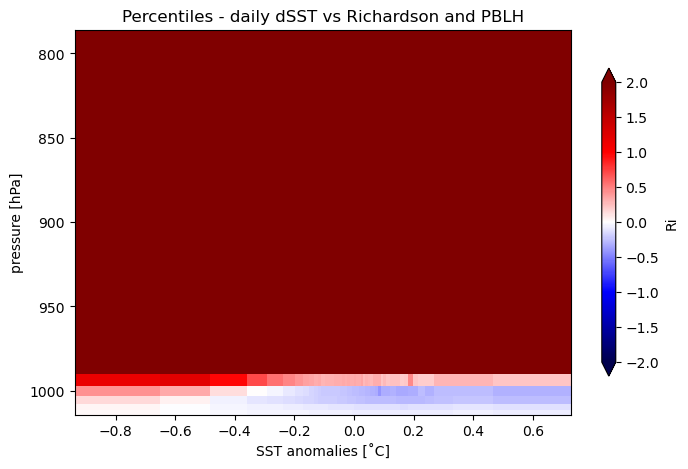

In [89]:
p_level_plot = int(15)

perc = True
x = pdist_dsst #if perc else dist_dsst_day
var = pdist_Ri[0:p_level_plot,:] #if perc else dist_dBV_freq_day[0:p_level_plot,:]*100000
minval = -2. #if perc else -0.05
maxval = -minval
title = 'Percentiles' #if perc else 'Fixed bins'

fig, ax1 = plt.subplots(figsize=(8, 5))  
ax1.invert_yaxis()
p1 = ax1.pcolormesh(x, mean_vert_pres[0:p_level_plot], var, vmin=minval, vmax=maxval, cmap='seismic')
ax1.set_xlabel('SST anomalies [˚C]'); ax1.set_ylabel('pressure [hPa]')
plt.title(f'{title} - daily dSST vs Richardson and PBLH')
cbar = plt.colorbar(p1,ax=ax1, location='right', shrink=0.8, extend='both')  
cbar.set_label('Ri')


'''x_pbl = pdist_dsst #if perc else dist_dsst
var_pbl = pdist_PBLH_dsst #if perc else dist_PBLH_dsst
ax1.plot(x_pbl, var_pbl, 'k')
ax1.text(0.4, 925, 'PBLH', fontsize=12)
'''


'''# DEF punti significativi (pvalue < 0.05)
pval = ppvalue_dBV_freq_day_sub[0:p_level_plot] #if perc else pvalue_dBV_freq_day_sub[0:p_level_plot]
GPbin = mean_vert_pres[1:p_level_plot] - np.diff(mean_vert_pres[0:p_level_plot])*0.5
signif_Lcorr_H = np.zeros((len(mean_vert_pres[0:p_level_plot])-1,len(x)-1))
dsstbin = np.zeros((len(mean_vert_pres[0:p_level_plot])-1,len(x)-1))
for h in range(0,len(mean_vert_pres[0:p_level_plot])-1):
    cond1 = pval[h,:-1] > 0.05
    cond2 = np.abs(var[h,:-1]) < 0.1*np.nanmean(np.abs(var))
    cond = (cond1) | (cond2)
#     cond = cond1
    signif_Lcorr_H[h,:] = np.zeros(len(x)-1) + np.nan
    signif_Lcorr_H[h, cond] = GPbin[h]
    dsstbin[h,:] = x[1:] - np.diff(x)*0.5
    
plt.scatter(dsstbin,signif_Lcorr_H,  s=0.7, color='k')'''


path_img = '/venus/tesi_ale/img_EU/RI/daily/FEB/' 
filename = path_img + 'pdist_dsst_RI_lowtropo.png' 
#plt.savefig(filename)
print(filename)
del filename

In [92]:
mean_vert_pres[8]

954.05237

/venus/tesi_ale/img_EU/RI/daily/FEB/pdist_dsst_RI_lowest3levels.png


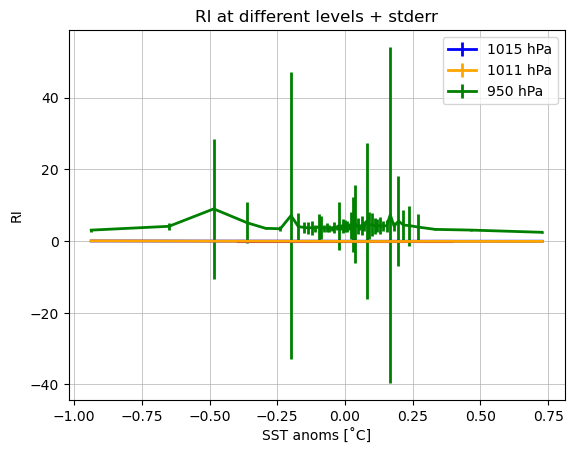

In [96]:
# let's see what happens in the lowest layers

plt.errorbar(pdist_dsst, pdist_Ri[0,:], yerr=pstderr_Ri[0,:], xerr=None,\
             label='1015 hPa', ecolor='b', linestyle='-', color='b', linewidth=2)

plt.errorbar(pdist_dsst, pdist_Ri[1,:], yerr=pstderr_Ri[1,:], xerr=None,\
             label='1011 hPa', ecolor='orange', linestyle='-', color='orange', linewidth=2)

plt.errorbar(pdist_dsst, pdist_Ri[5,:], yerr=pstderr_Ri[5,:], xerr=None,\
             label='950 hPa', ecolor='g', linestyle='-', color='g', linewidth=2)

#plt.errorbar(pdist_dsst, pdist_Ri[4,:], yerr=pstderr_Ri[4,:], xerr=None,\
#             label='997 hPa', ecolor='orange', linestyle='-', color='orange')

#plt.errorbar(pdist_dsst, pdist_Ri[6,:], yerr=pstderr_Ri[6,:], xerr=None,\
#             label='980 hPa', ecolor='k', linestyle='-', color='k')


plt.grid(which='major', linewidth=0.5)
plt.hlines(0, xmin=-0.4, xmax=0.4, colors='r')
plt.hlines(-0.25, xmin=-0.4, xmax=0.4, colors='r')
plt.vlines(0, ymin=-0.25, ymax=0., colors='r')

plt.legend()

plt.ylabel('RI')
plt.xlabel('SST anoms [˚C]')
plt.title('RI at different levels + stderr')



path_img = '/venus/tesi_ale/img_EU/RI/daily/FEB/' 
filename = path_img + 'pdist_dsst_RI_lowest3levels.png' 
plt.savefig(filename)
print(filename)
del filename

WHAT CONTRIBUTES THE MOST TO Ri CHANGES OVER dSST?

In [8]:
# CALCULATE BRUNT VAISALA
# BV_freq = mpcalc.brunt_vaisala_frequency_squared(GPH_inter*units.meters, pot_temp_full.values*units.kelvin, vertical_dim = 1)

N2_day = np.load('/venus/tesi_ale/data_EU/BV/daily/FEB/N2_day.npy')


In [9]:
# dudz2 = (mpcalc.first_derivative(U_day*units('m/s'), axis=1, x=GPH_inter*units.meters))**2
# dvdz2 = (mpcalc.first_derivative(V_day*units('m/s'), axis=1, x=GPH_inter*units.meters))**2

# shear = dudz2+dvdz2

shear_day = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/shear_day.npy')


In [52]:
N2_fst = np.load('/venus/tesi_ale/data_EU/BV/daily/FEB/N2_fst.npy')
N2_snd = np.load('/venus/tesi_ale/data_EU/BV/daily/FEB/N2_snd.npy')
N2_trd = np.load('/venus/tesi_ale/data_EU/BV/daily/FEB/N2_trd.npy')
N2_lst = np.load('/venus/tesi_ale/data_EU/BV/daily/FEB/N2_lst.npy')

N2 = np.concatenate([N2_fst, N2_snd, N2_trd, N2_lst], axis=0)
del N2_fst, N2_snd, N2_trd, N2_lst

In [54]:
shear_fst = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/shear_fst.npy')
shear_snd = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/shear_snd.npy')
shear_trd = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/shear_trd.npy')
shear_lst = np.load('/venus/tesi_ale/data_EU/WIND/daily/FEB/shear_lst.npy')

shear = np.concatenate([shear_fst, shear_snd, shear_trd, shear_lst], axis=0)
del shear_fst, shear_snd, shear_trd, shear_lst

In [56]:
dsst_fst = np.load('/venus/tesi_ale/data_EU/SST/daily/FEB/dsst_fst.npy')
dsst_snd = np.load('/venus/tesi_ale/data_EU/SST/daily/FEB/dsst_snd.npy')
dsst_trd = np.load('/venus/tesi_ale/data_EU/SST/daily/FEB/dsst_trd.npy')
dsst_lst = np.load('/venus/tesi_ale/data_EU/SST/daily/FEB/dsst_lst.npy')

dsst = np.concatenate([dsst_fst, dsst_snd, dsst_trd, dsst_lst], axis=0)
del dsst_fst, dsst_snd, dsst_trd, dsst_lst

In [58]:
### fitting outside

level = int(2)


x = dsst
y = N2[:,level,:,:]

fit_N2, corcoe_N2, p_value_N2, p_val_cann_N2, sigma_N2 = slopes_r_p_mix(x, y, nt, nskip)



In [59]:
der_fst_lev2 = fit_N2.slope/(shear[:,level,:,:])


num_days = int(der_fst_lev2.shape[0]/8)
der_fst_lev2_day = np.empty((num_days, *der_fst_lev2.shape[1:]))

for i in range(num_days):
    der_fst_lev2_day[i] = np.nanmean( der_fst_lev2[ i*8:(i+1)*8 ,:,:] , axis=0)

In [113]:
my_save_data('/venus/tesi_ale/data_EU/RI/daily/FEB/first_derivative_term_RI_3h_lev2.npy', [der_fst_lev2])

creating new file and saving variables


/venus/tesi_ale/img_EU/BV/daily/FEB/scatterFIT_dsst_N2_3hourly_lev3_feb.png


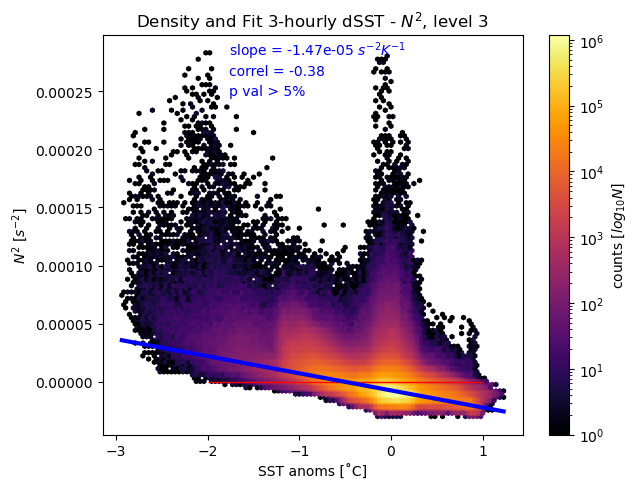

In [112]:
fig, ax1 = plt.subplots(1,1, figsize=(6.5,5))

level = int(2)
N2_multiplier = 10e+4


x = dsst
y =  N2[:,level,:,:]
    
title1=r'Density and Fit 3-hourly dSST - $N^2$, level '+str(level+1);  xlabel1='SST anoms [˚C]';  ylabel1=r'$N^2$ [$ s^{-2}$]'

density_hexbin_subplots(x, y, fit=fit_N2, corcoe=corcoe_N2, grdsz=100, fig=fig, ax=ax1, title=title1, xlabel=xlabel1, ylabel=ylabel1, colormap='inferno')



#### annotations
ff2 = "{:.2e}".format
ax1.annotate(r'slope = '+str(ff2(fit_N2.slope))+r' $s^{-2} K^{-1}$ ' , xy=(0.3, 0.95), \
                            xycoords='axes fraction', fontsize=10, color='blue')
#ax1.annotate(f'y = {ff2(fit_N2.intercept)} + {ff2(fit_N2.slope)}*x' , xy=(0.7, 0.95), \
#                            xycoords='axes fraction', fontsize=10, color='blue')
ax1.annotate('correl = '+str(round(corcoe_N2,2)), xy=(0.3, 0.9), \
                                xycoords='axes fraction', fontsize=10, color='blue')
if p_val_cann_N2 > 0.05:
    ax1.annotate('p val > 5% ', xy=(0.3, 0.85), xycoords='axes fraction', fontsize=10, color='blue')        
else:
    ax1.annotate('p val < 5% ', xy=(0.3, 0.85), xycoords='axes fraction', fontsize=10, color='blue')  
    
    ### mark 0 horizontally
ax1.hlines(0, xmin=-2, xmax=1, color='red', linewidth=1)
  
    
    
    
    
'''    #### "histogram"
title2 = r'$\frac{\partial N^2}{Δu^2 + Δv^2}$'
xlabel2 = r'$\frac{N^2}{Δu^2 + Δv^2}$ [Ri units / K]'
ylabel2 = 'density counts'

data = der_fst_lev2_day[~np.isnan(der_fst_lev2_day)]

ax2.hist(data, bins=500, density=True)

#### set percentiles
percentiles = np.array([5., 20., 30., 50., 75., 90., 95., 99.])
distrib_perc = np.zeros_like(percentiles)

for i in range(len(percentiles)):
    distrib_perc[i] = np.percentile(data, percentiles[i])


    
ax2.plot(distrib_perc, frequency, '*')


### annotate mode of values
der_fst_mode = stats.mode(der_fst_lev2_day[~np.isnan(der_fst_lev2_day)])

ax2.annotate('mode = '+str(round(der_fst_mode.mode[0],2))+r' Ri units $K^{-1}$', xy=(0.1, 0.9), \
                                xycoords='axes fraction', fontsize=10, color='blue')
ax2.set_title(title2);  ax2.set_xlabel(xlabel2);  ax2.set_ylabel(ylabel2)


'''
plt.tight_layout()



path_img = '/venus/tesi_ale/img_EU/BV/daily/FEB/' 
filename = path_img + 'scatterFIT_dsst_N2_3hourly_lev3_feb.png' #if stability else path_img + 'scatterFIT_sst_LH_feb_strongGrads.png'
# plt.savefig(filename)
print(filename)
del filename



In [101]:
hist, bin_edges = np.histogram(data, bins=1000, density=True)

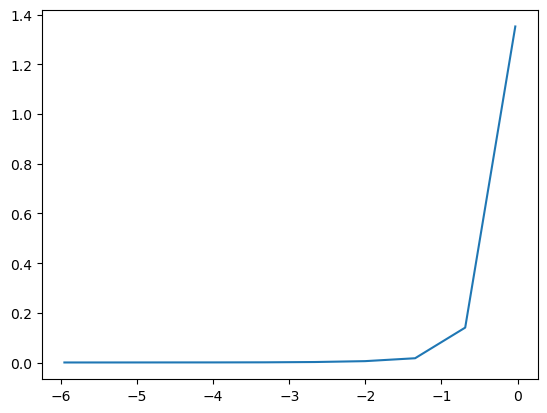

In [104]:
plt.plot(bin_edges[-10:], hist[-10:])

In [73]:
####### OLD SOLIUTIONS

# ax2.hist(data, bins=50, density=True, range=(-5,0))
'''
data = der_fst_lev2_day[~np.isnan(der_fst_lev2_day)]
hist, bin_edges = np.histogram(data, bins=100, density=True)

# Specify the range you want to display
value_range = (-2, 0)

# Filter the bins and histogram data to the specified range
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
filtered_bins = (bin_centers >= value_range[0]) & (bin_centers <= value_range[1])
filtered_hist = hist[filtered_bins]
filtered_bin_edges = bin_edges[:-1][filtered_bins]

# Plot the filtered histogram
ax2.bar(filtered_bin_edges, filtered_hist, width=np.diff(bin_edges)[0])'''

ModeResult(mode=array([-0.55605853]), count=array([6]))

In [79]:
der_fst_mode.mode[0]

-0.5560585260391235

In [84]:
bin_centers

array([-655.02849753, -648.44560001, -641.86270249, -635.27980497,
       -628.69690745, -622.11400993, -615.53111242, -608.9482149 ,
       -602.36531738, -595.78241986, -589.19952234, -582.61662482,
       -576.0337273 , -569.45082978, -562.86793226, -556.28503474,
       -549.70213723, -543.11923971, -536.53634219, -529.95344467,
       -523.37054715, -516.78764963, -510.20475211, -503.62185459,
       -497.03895707, -490.45605955, -483.87316203, -477.29026452,
       -470.707367  , -464.12446948, -457.54157196, -450.95867444,
       -444.37577692, -437.7928794 , -431.20998188, -424.62708436,
       -418.04418684, -411.46128933, -404.87839181, -398.29549429,
       -391.71259677, -385.12969925, -378.54680173, -371.96390421,
       -365.38100669, -358.79810917, -352.21521165, -345.63231414,
       -339.04941662, -332.4665191 , -325.88362158, -319.30072406,
       -312.71782654, -306.13492902, -299.5520315 , -292.96913398,
       -286.38623646, -279.80333895, -273.22044143, -266.63754

NameError: name 'N2_day' is not defined

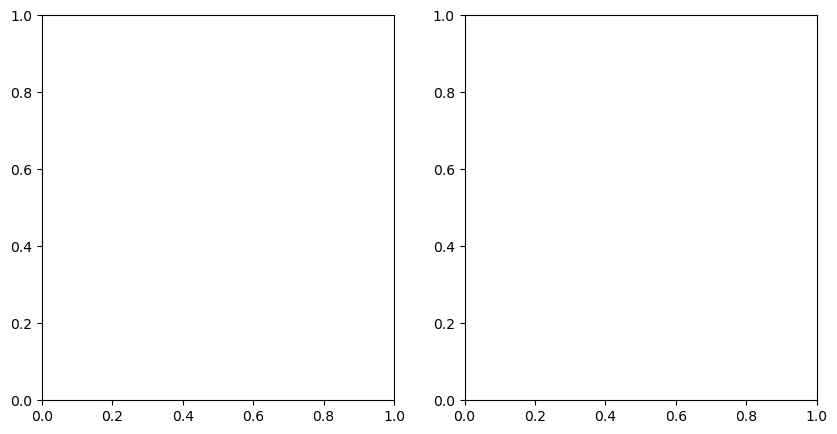

In [51]:
##### FITTING #####

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))


# this bool chooses what to assess:
#  True = changes in stability with dSST
#  False = changes in 1/shear with dSST
stability = True

level = int(2)
N2_multiplier = 10e+4

x = dsst_day

if stability:
    y =  N2[:,level,:,:]*N2_multiplier
    fit_N2, corcoe_N2, p_value_N2, p_val_cann_N2, sigma_N2 = slopes_r_p_mix(x, y, nt, nskip)
    title1=r'Scatter Density + Fit dSST - $N^2$'
    xlabel1='SST anoms [˚C]'
    ylabel1=r'$N^2$ [$10^4 s^{-2}$]'
    
    density_hexbin_subplots(x, y, fit=fit_N2, corcoe=corcoe_N2, grdsz=100, \
                            fig=fig, ax=ax1, title=title1, xlabel=xlabel1, ylabel=ylabel1, colormap='inferno')
    
    ax.annotate('y = '+str(round(fit_N2.intercept,2))+ ' + ' + str(round(fit_N2.slope,2))+'*x' , xy=(0.7, 0.95), \
                            xycoords='axes fraction', fontsize=10, color='blue')
    ax.annotate('corr coeff = '+str(round(corcoe_N2,2)), xy=(0.7, 0.9), \
                                xycoords='axes fraction', fontsize=10, color='blue')
                
    ax1.hlines(0, xmin=-2, xmax=1, color='red', linewidth=1)
    
    
    # compute the first term in Ri derivative
    der_fst = fit_N2.slope/(N2_multiplier*shear[:,level,:,:])
    
#     title2 = r'Scatter Density dSST - $\frac{\partial N^2}{Δu^2 + Δv^2}$'
#     xlabel2 = xlabel1
#     ylabel2 = r'$\frac{N^2}{Δu^2 + Δv^2}$'
    
#     density_hexbin_subplots(x, der_fst, fit=None, corcoe=None, grdsz=100, \
#                             fig=fig, ax=ax2, title=title2, xlabel=xlabel2, ylabel=ylabel2, colormap='inferno')
    
    title2 = r'Scatter Density $\frac{\partial N^2}{Δu^2 + Δv^2}$'
    xlabel2 = r'$\frac{N^2}{Δu^2 + Δv^2}$ [Ri units / K]'
    ylabel2 = 'density counts'
    
    ax2.hist(der_fst[~np.isnan(der_fst)], bins=50, density=True)
    ax2.set_title(title2);  ax2.set_xlabel(xlabel2);  ax2.set_ylabel(ylabel2)
    
    
    plt.tight_layout()
    
    
    
    
    
else:
    y = (shear_day[:,level,:,:])
    fit_shear, corcoe_shear, p_value_shear, p_val_cann_shear, sigma_shear = slopes_r_p_mix(x, y, nt, nskip)
    
    title1=r'Scatter Density + Fit dSST - $(Δu^2+Δv^2)^{-1}$'
    xlabel1='SST anoms [˚C]'
    ylabel1=r'$(Δu^2+Δv^2)^{-1}$ [$s^2$]'
    
    density_hexbin_subplots(x, y, fit=fit_shear, corcoe=corcoe_shear, grdsz=100, \
                            fig=fig, ax=ax1, title=title1, xlabel=xlabel1, ylabel=ylabel1, colormap='inferno')
    
    
    
    # compute the second term in Ri derivative
    der_snd = -N2_day[:,level,:,:]*(fit_shear.slope)/(shear_day[:,level,:,:])**2
    
    title2 = r'Scatter Density $-\frac{N^2}{(Δu^2 + Δv^2)^2}\cdot \partial (Δu^2 + Δv^2) $'
    xlabel2 = r'$-\frac{N^2}{(Δu^2 + Δv^2)^2}\cdot \partial (Δu^2 + Δv^2) $  [Ri units / K]'
    ylabel2 = 'density counts'
    
    ax2.hist(der_snd[~np.isnan(der_snd)], bins=50) #, density=True)
    ax2.set_title(title2);  ax2.set_xlabel(xlabel2);  ax2.set_ylabel(ylabel2)
    
    plt.tight_layout()



    

path_img = '/venus/tesi_ale/img_EU/LH/daily/FEB/' 
filename = path_img + 'scatterFIT_dsst_dLH_feb_strongGrads.png' if stability else path_img + 'scatterFIT_sst_LH_feb_strongGrads.png'
#plt.savefig(filename)
print(filename)
del filename

In [17]:
stats.describe(der_fst[~np.isnan(der_fst)])   # der_snd[~np.isnan(der_snd)]

DescribeResult(nobs=5693889, minmax=(-4.479728722805508, -0.029234629898978952), mean=-0.3315603946324149, variance=0.05503679967662181, skewness=-2.4656105203976515, kurtosis=10.84008937939194)

In [18]:
# stats.median(der_fst[~np.isnan(der_fst)])
np.percentile(der_fst[~np.isnan(der_fst)], 50)

-0.24956476631793456

/venus/tesi_ale/img_EU/RI/daily/FEB/maps_dsst_RI_day11_6sst.png


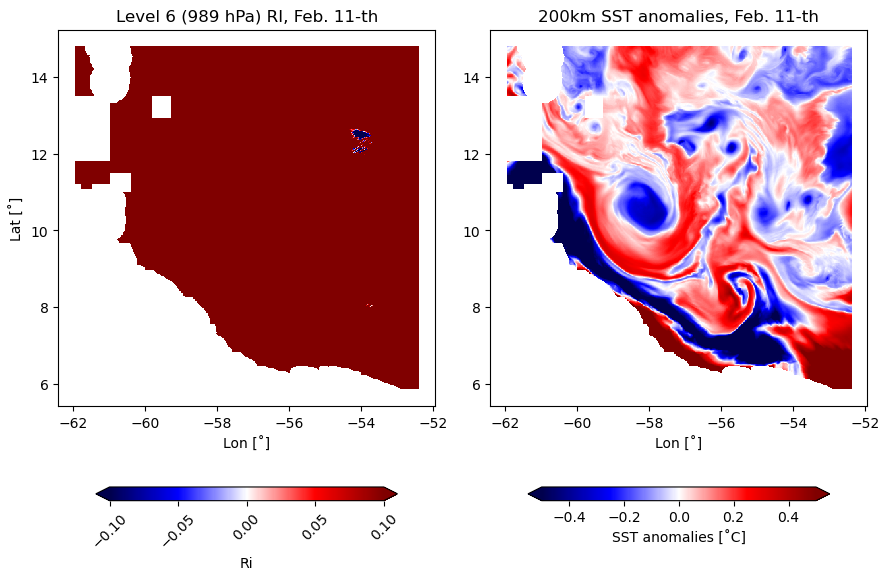

In [50]:
minval = -0.1
maxval = -minval 
level = [int(1), int(3), int(5)]; day = int(10)

fig, ax = plt.subplots(1, 2, figsize=(9,6))
#ax1, ax2, ax3, ax4 = axes.flatten()

# ######## THIS IS FOR THE FULL RI
# title1=f'Level {level[0]+1} ({int(mean_vert_pres[level[0]])} hPa) RI, Feb. {day+1}-th'

# p1 = ax[0].pcolormesh(lon_M, lat_M, RI_day[day,level[0],:,:], cmap='seismic', vmin=minval, vmax=maxval)
# #ax1.set_xlabel('Lon [˚]'); 
# ax[0].set_ylabel('Lat [˚]'); ax[0].set_title(f'{title1}')
# # cbar = plt.colorbar(p1,ax=[ax1,ax3], shrink=0.8, extend='both', location='left')  
# # cbar.set_label('Ri')


# title2=f'Level {level[1]+1} ({int(mean_vert_pres[level[1]])} hPa) RI, Feb. {day+1}-th'

# p2 = ax[1].pcolormesh(lon_M, lat_M, RI_day[day,level[1],:,:], cmap='seismic', vmin=minval, vmax=maxval)
# #ax2.set_xlabel('Lon [˚]'); ax1.set_ylabel('Lat [˚]')
# ax[1].set_title(f'{title2}')
# #cbar = plt.colorbar(p2,ax=ax2, shrink=0.8, extend='both', location='bottom')  
# #cbar.set_label('Ri')



title3=f'Level {level[2]+1} ({int(mean_vert_pres[level[2]])} hPa) RI, Feb. {day+1}-th'

p3 = ax[0].pcolormesh(lon_M, lat_M, RI_day[day,level[2],:,:], cmap='seismic', vmin=minval, vmax=maxval)
ax[0].set_xlabel('Lon [˚]'); ax[0].set_ylabel('Lat [˚]')
ax[0].set_title(f'{title3}')
cbar = plt.colorbar(p3,ax=ax[0], shrink=0.8, extend='both', location='bottom')  
cbar.set_label('Ri')
cbar.ax.tick_params(labelrotation=45)

##################

#dsst map
min_dsst = -0.5;  max_dsst = -min_dsst

title_sst=f'200km SST anomalies, Feb. {day+1}-th'

p4 = ax[1].pcolormesh(lon_M, lat_M, dsst_day[day,:,:], cmap='seismic', vmin=min_dsst, vmax=max_dsst)
ax[1].set_xlabel('Lon [˚]'); #ax2.set_ylabel('Lat [˚]')
ax[1].set_title(f'{title_sst}')
cbarsst = plt.colorbar(p4,ax=ax[1], shrink=0.8, extend='both', location='bottom')  
cbarsst.set_label('SST anomalies [˚C]')



plt.tight_layout()


path_img = '/venus/tesi_ale/img_EU/RI/daily/FEB/' 
filename = path_img + 'maps_dsst_RI_day11_6sst.png' 
plt.savefig(filename)
print(filename)
del filename